<a href="https://colab.research.google.com/github/cksdlakstp12/DataVisualization/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- X 축 (왼쪽에서 오른쪽)
1. 전국 수도권 지방권
2  서울 인천 부산 대구 광주 대전 율산 세종 제주
3. 경시 강원 충북 충남 전북 전남 경북 경남

- Y 축 (위에서 아래)
1. 아파트 매매가격지수 
2. 아파트 전세가격지수 
3. 종합주택 월세거래동향 
4. 주택거래 현황(동호수) 
5. 주택거래 현황(면적)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,234 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount("/content/drive")
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
dataset_dir = "/content/drive/MyDrive/datasets/real_estate"
apartment_trading_dataset_path = f"{dataset_dir}/한국부동산원_아파트_매매가격지수(월별)_20210731.csv"
apartment_charter_dataset_path = f"{dataset_dir}/한국부동산원_전세가격지수(아파트)_20210731.csv"
housing_monthly_rent_dataset_path = f"{dataset_dir}/한국부동산원_종합주택유형별_월세거래동향(월별)_20190307.csv"
housing_trading_dataset_path = f"{dataset_dir}/한국부동산원_주택거래_현황_20201231.csv"

In [ ]:
apartment_trading_dataset = pd.read_csv(apartment_trading_dataset_path, encoding="cp949")
apartment_charter_dataset = pd.read_csv(apartment_charter_dataset_path, encoding="cp949")
housing_monthly_rent_dataset = pd.read_csv(housing_monthly_rent_dataset_path, encoding="cp949")
housing_trading_dataset = pd.read_csv(housing_trading_dataset_path, encoding="cp949")

In [ ]:
datasets = [apartment_trading_dataset, apartment_charter_dataset, housing_monthly_rent_dataset, housing_trading_dataset]

provinces = [["전국", "수도권", "지방권"],                                              # general
            ["서울", "인천", "부산", "대구", "광주", "대전", "울산", "세종", "제주"],   # 주요 도시 9개
            ["경기", "강원", "충북", "충남", "전북", "전남", "경북", "경남"]]           # 도 8개

In [ ]:
filtered_df = []

for idx, ds in enumerate(datasets):
  df = pd.DataFrame(ds)  
  
  try:
    filtered_data = []

    row_idx = [[df.index[df["지역"] == p].tolist()[0] for p in province] for province in provinces]

    filtered_data.append(df.loc[row_idx[0]])
    filtered_data.append(df.loc[row_idx[1]])
    filtered_data.append(df.loc[row_idx[2]])

    filtered_df.append(filtered_data)

  except IndexError:
    filtered_data1 = []
    filtered_data2 = []

    row_idx1 = df.index[df["지역"] == "전국"]
    row_idx2 = [[df.index[df["지역"] == p].tolist()[0] for p in province] for province in provinces[1:]]

    even = list(range(0, len(df.columns), 2))
    odd = list(range(1, len(df.columns), 2))
    
    filtered_data1.append(df.iloc[row_idx1, odd])
    filtered_data1.append(df.iloc[row_idx2[0], odd])
    filtered_data1.append(df.iloc[row_idx2[1], odd])

    filtered_data2.append(df.iloc[row_idx1, even])
    filtered_data2.append(df.iloc[row_idx2[0], even])
    filtered_data2.append(df.iloc[row_idx2[1], even])

    filtered_df.append(filtered_data1)
    filtered_df.append(filtered_data2)

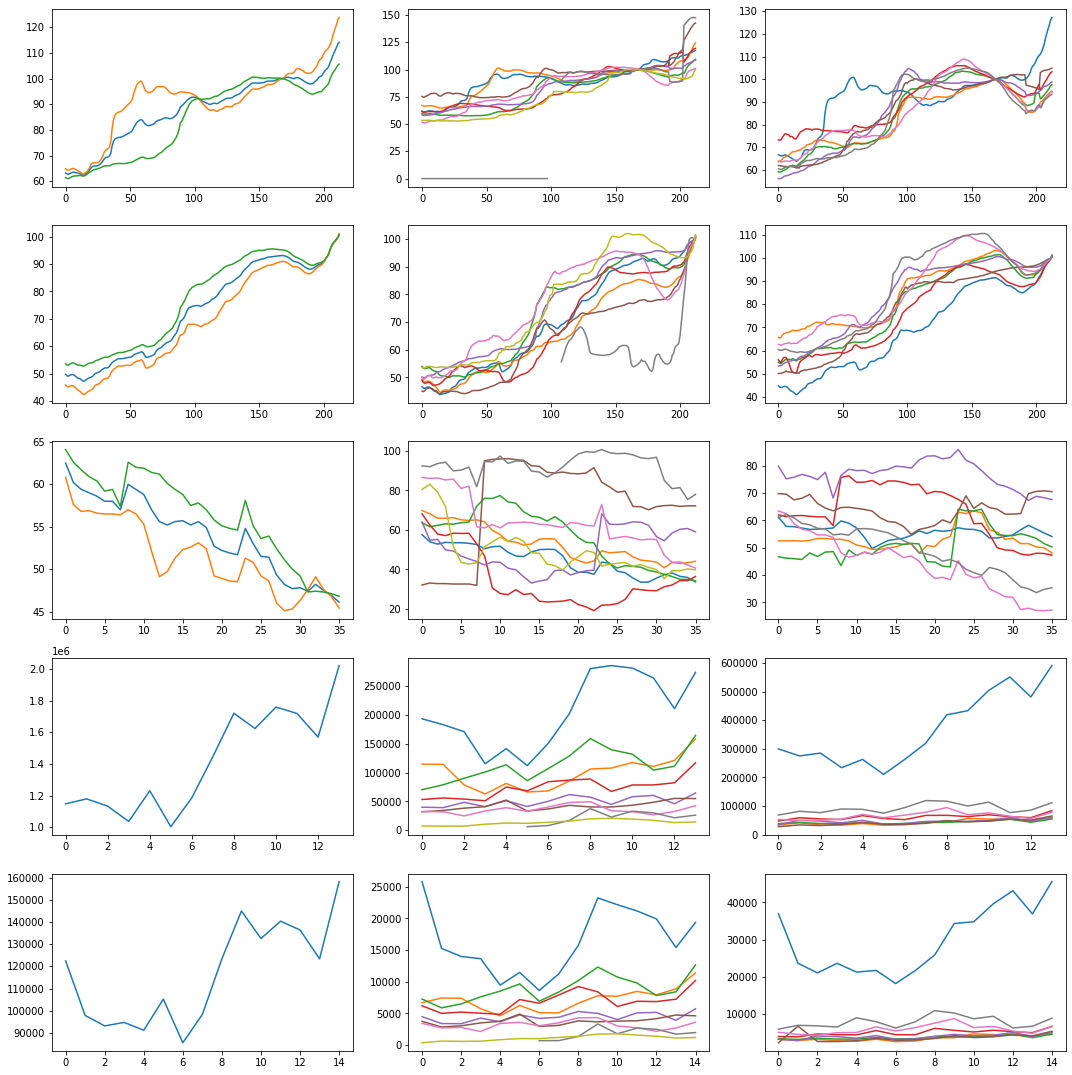

In [ ]:
subtitle = ["매매가격지수", "전세가격지수", "월세거래동향",
            "주택거래 현황(동호수)", "주택거래 현황(면적)"]
figure, ax = plt.subplots(5, 3, figsize=(15, 15))

for idx1, filtered_data in enumerate(filtered_df):
  for idx2, province_data in enumerate(filtered_data):
    
    for i, p in enumerate(np.array(province_data)):
      ax[idx1, idx2].plot(range(len(p)-1), p[1:])
      # subplot_title = (subtitle[idx2] + "\n" +" ".join(province))
      # ax[idx1, idx2].set_title(subplot_title)
      #ax[idx1, idx2].xlabel('Year - Month')
      #ax[idx1, idx2].ylabel('value')
    
figure.tight_layout()
plt.show()

[[], [], [], []]
